In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import neighbors, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

In [78]:
df=pd.read_csv(r'C:\Users\Brain Hacker\Downloads\case_time_series.csv')
print("Number of nulls for each column:")
print(df.isnull().sum())
print(df.shape)

Number of nulls for each column:
Date               0
Date_YMD           0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64
(500, 8)


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Confirmed,500.0,58877.718,8.781415e+04,0.0,8681.00,26239.0,67794.50,414280.0
Total Confirmed,500.0,7259978.022,7.553843e+06,1.0,214453.75,6718256.5,10841201.75,29438859.0
Daily Recovered,500.0,56071.486,8.563800e+04,0.0,4710.25,22798.5,61941.00,422391.0
Total Recovered,500.0,6555864.950,6.874362e+06,0.0,103116.75,5700258.5,10536563.00,28035743.0
Daily Deceased,500.0,739.632,1.060705e+03,0.0,104.00,384.0,883.00,6139.0
Total Deceased,500.0,98312.744,8.952695e+04,0.0,6023.25,103510.0,154546.50,369816.0


In [91]:
df['Daily Recovered'].describe()

count       500.000000
mean      56071.486000
std       85638.003492
min           0.000000
25%        4710.250000
50%       22798.500000
75%       61941.000000
max      422391.000000
Name: Daily Recovered, dtype: float64

In [95]:
x=df['Daily Confirmed'].values
y=df['Daily Recovered'].values
x[(x<8681) | (x>67794)]=26239
y[(y<4710) | (y>61941)]=22798

array([26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239, 26239,
       26239, 26239, 26239, 26239, 26239,  8789, 26239,  8812,  9689,
        9847,  9472,

In [39]:
pd.DataFrame(a).describe()

,0
count,250.000000
mean,83378.044000
std,113664.627883
min,0.000000
25%,27.500000
50%,33338.000000
75%,94148.000000
max,422391.000000


In [98]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

In [101]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [109]:
y_pred=reg.predict(x_test)
y_pred

array([[24360.38490314],
       [24731.83960339],
       [46758.79118148],
       [19575.79864646],
       [30957.29552088],
       [24360.38490314],
       [24360.38490314],
       [24360.38490314],
       [24360.38490314],
       [24360.38490314],
       [24360.38490314],
       [24360.38490314],
       [24360.38490314],
       [17753.48558758],
       [24360.38490314],
       [15639.62741102],
       [24360.38490314],
       [24360.38490314],
       [14242.45830319],
       [24360.38490314],
       [41908.65409534],
       [19324.20832007],
       [50299.78455933],
       [16669.08758029],
       [18342.19446546],
       [24360.38490314],
       [24360.38490314],
       [34846.64473527],
       [24360.38490314],
       [31152.69942202],
       [24360.38490314],
       [14678.83953928],
       [31353.72196568],
       [22973.82878674],
       [24360.38490314],
       [15807.56239315],
       [24360.38490314],
       [24360.38490314],
       [36301.24885558],
       [16667.21469945],


In [110]:
from sklearn.metrics import r2_score
print ('Coefficient', reg.coef_)
print ('Intercept', reg.intercept_)
r2_score(y_test,y_pred)

Coefficient [[0.62429361]]
Intercept [7979.54476887]


0.5835541428549706

[[24360]
 [24731]
 [46758]
 [19575]
 [30957]
 [24360]
 [24360]
 [24360]
 [24360]
 [24360]
 [24360]
 [24360]
 [24360]
 [17753]
 [24360]
 [15639]
 [24360]
 [24360]
 [14242]
 [24360]
 [41908]
 [19324]
 [50299]
 [16669]
 [18342]
 [24360]
 [24360]
 [34846]
 [24360]
 [31152]
 [24360]
 [14678]
 [31353]
 [22973]
 [24360]
 [15807]
 [24360]
 [24360]
 [36301]
 [16667]
 [15290]
 [24360]
 [24360]
 [24360]
 [13892]
 [13420]
 [24360]
 [24360]
 [24360]
 [41215]
 [32755]
 [24360]
 [39239]
 [19428]
 [20673]
 [23683]
 [16048]
 [24360]
 [19160]
 [13818]
 [24360]
 [24360]
 [24367]
 [18482]
 [24360]
 [24360]
 [24360]
 [24360]
 [49848]
 [24360]
 [24360]
 [24360]
 [24080]
 [24360]
 [24360]
 [24360]
 [17028]
 [24360]
 [16243]
 [24360]
 [24360]
 [24360]
 [24360]
 [15556]
 [43330]
 [21680]
 [24360]
 [24360]
 [41077]
 [24360]
 [24360]
 [39422]
 [37463]
 [24360]
 [36447]
 [24360]
 [24360]
 [15928]
 [31334]
 [42295]]


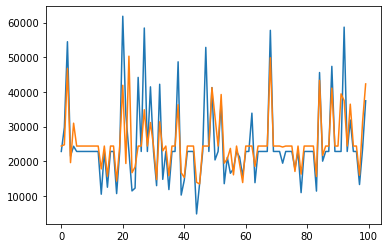

In [111]:
y_pred= reg.predict(x_test)
print(y_pred.astype(np.int64))
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

In [115]:
reg.predict([[100000]])

array([[70408.90615562]])